### 01. 라이브러리 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.neighbors import KNeighborsClassifier

### 02. 데이터 불러오기 (xlsx)

In [2]:
df = pd.read_excel('wpdb.xlsx')
df.head()

,UID,CenterId,StudentName,SchoolName,SchoolGrade,SchoolLevel,StudentGrade,Address,Address2,StudentStatus,cs_count,max_sche_date,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,00249736-53A0-4D68-8CB9-DFA306A33435,15,임현승,성동중학교,1학년,high,17,NaN,NaN,drop,5,2023-11-17,0,3,0,0,1,41,0
1,00515C99-00A6-444B-93A3-73D7BB0852E5,15,노해율,내성중학교,3학년,middle,16,부산 동래구 금정마을로 135-9(동래 래미안 아이파크),2단지-5호차,present,5,2023-07-20,0,19,0,0,0,52,0
2,00600FC7-C7DE-40DE-AD7D-A1D94DD5D212,16,신아인,경일중학교,3학년,middle,16,부산 강서구 명지국제7로 110(더 힐 시그니처),NaN,present,8,2024-02-15,0,0,0,0,0,0,1
3,0063DEBD-095C-4804-A246-7EDD5160419A,14,손태윤,브니엘예술중학교,3학년,middle,16,NaN,NaN,drop,2,2023-10-01,0,0,0,0,0,6,0
4,007378EC-9A44-4A75-8B1A-70D13FBE7832,16,오주안,오션중학교,3학년,middle,16,NaN,명지 오션 11로 87,present,29,2024-02-15,0,23,0,0,1,278,1


### 03. 학습에 사용될 데이터와 예측 데이터 설정
- 학습 데이터 X
- 예측 데이터 y
    - 0과 1의 값만 존재하며, 분류를 이용하여 예측 예정

In [3]:
X=df[df.columns[6:]]
X.head()

,StudentGrade,Address,Address2,StudentStatus,cs_count,max_sche_date,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,17,NaN,NaN,drop,5,2023-11-17,0,3,0,0,1,41,0
1,16,부산 동래구 금정마을로 135-9(동래 래미안 아이파크),2단지-5호차,present,5,2023-07-20,0,19,0,0,0,52,0
2,16,부산 강서구 명지국제7로 110(더 힐 시그니처),NaN,present,8,2024-02-15,0,0,0,0,0,0,1
3,16,NaN,NaN,drop,2,2023-10-01,0,0,0,0,0,6,0
4,16,NaN,명지 오션 11로 87,present,29,2024-02-15,0,23,0,0,1,278,1


In [4]:
X = X.drop(columns = ['Address','Address2', 'max_sche_date', 'StudentStatus'])
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,17,5,0,3,0,0,1,41,0
1,16,5,0,19,0,0,0,52,0
2,16,8,0,0,0,0,0,0,1
3,16,2,0,0,0,0,0,6,0
4,16,29,0,23,0,0,1,278,1
...,...,...,...,...,...,...,...,...,...
2492,15,2,1,20,0,0,0,64,1
2493,16,9,0,0,0,0,0,0,1
2494,16,3,1,9,0,0,0,23,0
2495,17,6,0,0,0,0,0,0,1


### 04. 나이 데이터 0, 1, 2로 변환

In [5]:
X['StudentGrade'].replace({15: 0, 16: 1, 17:2}, inplace=True)

In [6]:
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,2,5,0,3,0,0,1,41,0
1,1,5,0,19,0,0,0,52,0
2,1,8,0,0,0,0,0,0,1
3,1,2,0,0,0,0,0,6,0
4,1,29,0,23,0,0,1,278,1
...,...,...,...,...,...,...,...,...,...
2492,0,2,1,20,0,0,0,64,1
2493,1,9,0,0,0,0,0,0,1
2494,1,3,1,9,0,0,0,23,0
2495,2,6,0,0,0,0,0,0,1


In [7]:
pd.DataFrame(X).describe()

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,1.080497,10.095715,0.236684,8.060473,0.010813,0.028835,2.785342,64.474169,0.567080
std,0.822076,10.497140,0.648321,9.690521,0.130807,0.447538,5.310735,80.639647,0.495579
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,1.000000,6.000000,0.000000,4.000000,0.000000,0.000000,0.000000,31.000000,1.000000
75%,2.000000,14.000000,0.000000,13.000000,0.000000,0.000000,3.000000,95.000000,1.000000
max,2.000000,62.000000,19.000000,64.000000,2.000000,11.000000,54.000000,396.000000,1.000000


In [8]:
print(X.shape)
type(X)

(2497, 9)


pandas.core.frame.DataFrame

In [9]:
# 정답(레이블) 설정
y = X['target']
y # 0과 1로 구분, 1:재원 / 0:퇴원

0       0
1       0
2       1
3       0
4       1
       ..
2492    1
2493    1
2494    0
2495    1
2496    0
Name: target, Length: 2497, dtype: int64

In [10]:
print(y.shape)

(2497,)


In [11]:
X = X.drop(columns = ['target'])

In [12]:
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count
0,2,5,0,3,0,0,1,41
1,1,5,0,19,0,0,0,52
2,1,8,0,0,0,0,0,0
3,1,2,0,0,0,0,0,6
4,1,29,0,23,0,0,1,278
...,...,...,...,...,...,...,...,...
2492,0,2,1,20,0,0,0,64
2493,1,9,0,0,0,0,0,0
2494,1,3,1,9,0,0,0,23
2495,2,6,0,0,0,0,0,0


### 05. 결측치 확인

In [13]:
X.isnull().sum()

StudentGrade          0
cs_count              0
withdraw_csl_count    0
remain_csl_count      0
supply_count          0
clinic_count          0
abs_count             0
pre_count             0
dtype: int64

### 06. 데이터 정규화

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

### 1) 학습 데이터의 정규화

In [15]:
scaler_minmax.fit(X)
X_scaled_minmax_train=scaler_minmax.transform(X)
pd.DataFrame(X_scaled_minmax_train).describe()

# 최소값(min)은 0으로, 최대값(max)은 1로 나타난 걸 확인할 수 있음

,0,1,2,3,4,5,6,7
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,0.540248,0.149110,0.012457,0.125945,0.005406,0.002621,0.051580,0.162814
std,0.411038,0.172084,0.034122,0.151414,0.065404,0.040685,0.098347,0.203635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016393,0.000000,0.015625,0.000000,0.000000,0.000000,0.010101
50%,0.500000,0.081967,0.000000,0.062500,0.000000,0.000000,0.000000,0.078283
75%,1.000000,0.213115,0.000000,0.203125,0.000000,0.000000,0.055556,0.239899
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
'''X_scaled_standard_train'''

'X_scaled_standard_train'

### 2) 검증 데이터의 정규화

In [17]:
'''scaler_standard.fit(X_val)
X_scaled_standard_train=scaler_standard.transform(X_val)
pd.DataFrame(X_scaled_standard_train).describe()'''

'scaler_standard.fit(X_val)\nX_scaled_standard_train=scaler_standard.transform(X_val)\npd.DataFrame(X_scaled_standard_train).describe()'

### 3) 테스트 데이터의 정규화

In [18]:
'''X_scaled_minmax_test=scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()'''

'X_scaled_minmax_test=scaler_minmax.transform(X_test)\npd.DataFrame(X_scaled_minmax_test).describe()'

### 07. 학습 데이터와 검증용 데이터 분리
- Train/Test set 분리
- Train/Validation/Test set 분리

In [19]:
# Train/Test set 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 1) 

# stratify : 훈련 데이터와 테스트 데이터를 구분할 때, 레이블의 범주비율에 맞게 하라는 것 (회귀에는 사용 X)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1747, 8), (750, 8), (1747,), (750,))

In [21]:
'''# Train/Validation/Test set 분리 (6:2:2)

X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, stratify=y_tmp, random_state=0)'''

'# Train/Validation/Test set 분리 (6:2:2)\n\nX_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, stratify=y_tmp, random_state=0)'

In [22]:
'''X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape'''

'X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape'

### 08. Decision Tree 학습

In [23]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms

In [24]:
# DT 객체 생성 및 훈련
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

### 07. 테스트셋에 대한 모델 예측 시행

In [25]:
# 예측값 저장
y_pred = dt_clf.predict(X_test)

### 09. 모델 학습 결과 평가 및 결과지표 확인(컨퓨전 매트릭스)

In [26]:
import sklearn.metrics as mt

In [27]:
print('Train_Accuracy: ', dt_clf.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  0.9736691471093303 

Accuracy:  0.80 

Recall:  0.82 

Precision:  0.83 

F1_score:  0.82 

Confusion Matrix: 
 [[251  74]
 [ 76 349]]


In [28]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN) 수동 정확도 계산
(259+345) / matrix .sum()

0.8053333333333333

### 10. K-Fold 교차검증(cross-validation)

In [29]:
# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, X, y, cv = 5)
scores

array([0.81      , 0.788     , 0.77755511, 0.78957916, 0.7755511 ])

In [30]:
pd.DataFrame(cross_validate(dt_clf, X, y, cv =5))

,fit_time,score_time,test_score
0,0.005008,0.000000,0.806000
1,0.008275,0.001451,0.794000
2,0.000000,0.000000,0.781563
3,0.000000,0.000000,0.799599
4,0.017170,0.000999,0.785571


In [31]:
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.7881370741482966


### 11. 하이퍼 파라미터 튜닝
- criterion : 이론 파트에서 다룬 노드 분리기준입니다. 'gini'와 'entropy'를 사용합니다.
- splitter : 노드 분리 방법으로 'random', 'best'를 사용합니다.
- max_depth : 트리 모형의 최대 깊이를 의미하며 값이 커질수록 깊어져 과적합이 쉽게 일어납니다.
- min_samples_split : 중간노드에서 분리가 일어나기 위한 샘플의 수입니다. 
- min_samples_leaf : leaf 노드에서 필요한 최소한의 샘플 수이며 너무 적으면 과적합이 일어날 수 있습니다.
- max_features : 노드를 분리할 때 고려하는 속성의 수입니다. 'int', 'float', 'auto', 'sqrt', 'log2', None 값이 들어가며 각 다른 방식으로 계산해 속성의 수를 고려합니다.
- random_state : 다른 알고리즘에도 공통으로 들어가는 파라미터로 알고리즘은 실행마다 값이 변하기 때문에 값 변화를 보기 힘듭니다. 하지만 random_state를 고정하면 값 변화를 살펴보고 모델의 성능 개선에 대한 판단을 내릴 수 있습니다. 

#### GridSearchCV
- sklearn 패키지에서 제공하는 것으로 튜닝하고 싶은 파라미터를 집어넣어 튜닝과 교차검증을 함께 진행할 수 있게 도와줌
- gridsearch는 확인하고 싶은 다양한 파라미터값을 넣어주면 그것들을 하나씩 확인하면서 스코어를 내고 가장 좋은 성능의 모델에 대한 결과를 확인하고 사용할 수 있음

In [32]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

dt_clf = DecisionTreeClassifier(random_state=33)
parameters = {'max_depth': [3, 5, 7],
              'min_samples_split': [3, 5],
              'splitter': ['best', 'random']}

grid_dt = GridSearchCV(dt_clf, # estimator 객체,
                      param_grid = parameters, cv = 5,
                      n_jobs = -1 #모든 cpu를 사용)
                      )

grid_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,splitter,mean_test_score
4,5,3,best,0.826536
6,5,5,best,0.826536
10,7,5,best,0.825392
8,7,3,best,0.823109
9,7,3,random,0.761279
11,7,5,random,0.755561
0,3,3,best,0.737256
2,3,5,best,0.737256
5,5,3,random,0.718957
7,5,5,random,0.718957


In [43]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

dt_clf = DecisionTreeClassifier(random_state=33)
param = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [x for x in range(3, 15,2)],
              'min_samples_leaf': [x for x in range(1, 15,2)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight': ['balanced', None],
              'splitter': ['best', 'random']}

grid_dt2 = GridSearchCV(dt_clf, # estimator 객체,
                      param_grid = param, cv = 5,
                      n_jobs = -1 #모든 cpu를 사용)
                      )

grid_dt2.fit(X_train, y_train)

result = pd.DataFrame(grid_dt2.cv_results_['params'])
result['mean_test_score'] = grid_dt2.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6720 fits failed out of a total of 20160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Ara\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Ara\anaconda3\Lib\site-packages\skl

,class_weight,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,splitter,mean_test_score
2864,None,gini,9,sqrt,1,11,best,0.814523
3952,None,entropy,9,log2,1,7,best,0.813934
944,balanced,gini,9,log2,3,11,best,0.813364
930,balanced,gini,9,log2,1,9,best,0.811666
3950,None,entropy,9,log2,1,5,best,0.811641
...,...,...,...,...,...,...,...,...
3859,None,entropy,9,auto,13,9,random,NaN
3860,None,entropy,9,auto,13,11,best,NaN
3861,None,entropy,9,auto,13,11,random,NaN
3862,None,entropy,9,auto,13,13,best,NaN


#### 파라미터 유형
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [x for x in range(3, 15,2)],
              'min_samples_leaf': [x for x in range(1, 15,2)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight': ['balanced', None],
              'splitter': ['best', 'random']}

### 12. 시각화

In [34]:
'''conda install python-graphviz'''

'conda install python-graphviz'

In [35]:
'''%pip install graphviz
%pip install pydotplus'''

'%pip install graphviz\n%pip install pydotplus'

In [36]:
# 하이퍼파라미터 설정
max_depth = 3
min_samples_split = 3
splitter = 'best'

# Decision Tree 모델 생성 및 설정
best_decision_tree = DecisionTreeClassifier(max_depth=max_depth,
                                             min_samples_split=min_samples_split,
                                             splitter=splitter,
                                             random_state=42)

# 모델 학습
best_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=42)

In [37]:
x_list = list(X.columns)
print(x_list)

['StudentGrade', 'cs_count', 'withdraw_csl_count', 'remain_csl_count', 'supply_count', 'clinic_count', 'abs_count', 'pre_count']


In [38]:
y_list = list(y.drop_duplicates(inplace=False))
print(y_list)
print(type(y_list))

[0, 1]
<class 'list'>


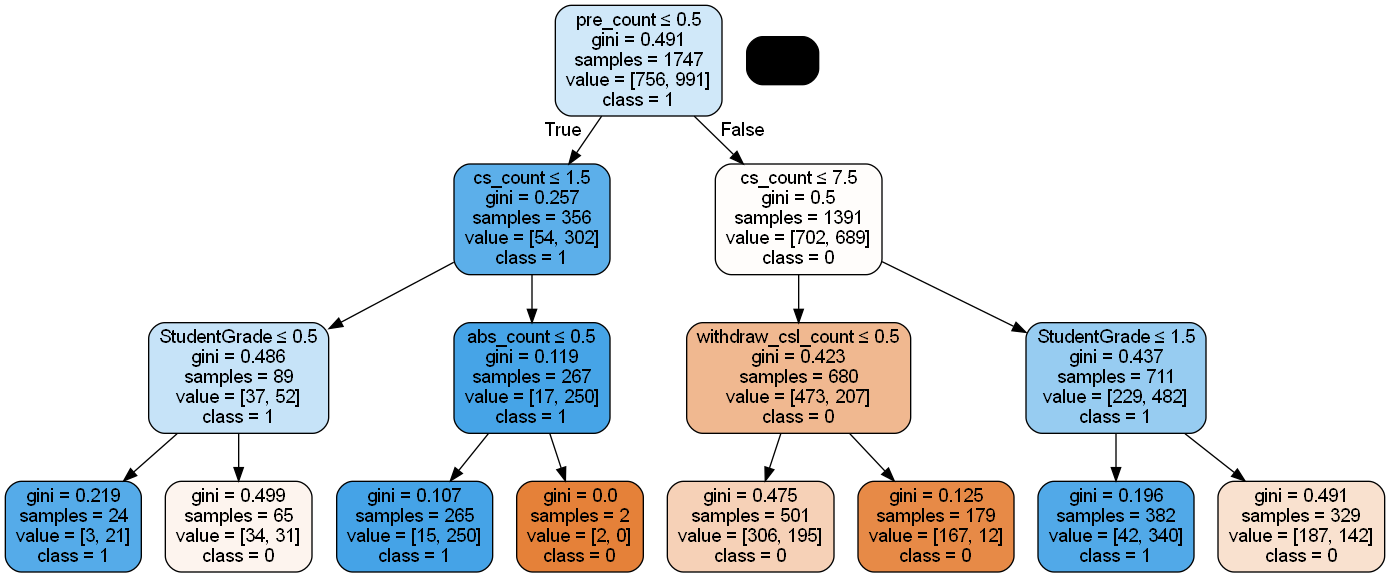

In [41]:
# 의사결정트리 시각화를 위한 작업
# 트리 시각화를 위한 export_graphviz 모듈 임포트 (이를 위해 graphviz 별도 설치 필요)
from sklearn.tree import export_graphviz
import pydotplus                                  # graphviz의 dot language 와의 인터페이스를 제공하는 패키지 임포트
from IPython.display import Image                # IPython의 display와 관련된 Public API
import numpy as np

x_list = list(X.columns)
y_list = list(y.drop_duplicates(inplace=False))
y_list = np.array(y_list)

# export_graphviz() : 의사결정트리에 대한 graphviz dot data를 생성하는 함수
dot_data = export_graphviz(best_decision_tree, out_file=None, feature_names=x_list,
                          class_names=[str(i) for i in y_list], filled=True, rounded=True, special_characters=True)

# matplotlib.rc('font', family='AppleGothic')
#graph = pydotplus.graph_from_dot_data(dot_data)  # graphviz의 dot data로부터 트리 그래프 생성

# 트리 그래프를 위한 png 이미지 생성 및 출력
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())